In [43]:
import torch.nn
from torch.nn import MSELoss
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## Linear regression

In [1220]:
def plot_regression(x, y, title, preds=None):
    _ = plt.figure()
    plt.suptitle(title)
    plt.scatter(x, y)
    if preds is not None:
        plt.plot(x, preds)
    plt.show()

def generate_linear_data(n):
    x = np.linspace(0, 3, n, dtype=np.float32)
    y = 1+2*x+np.random.normal(size=x.shape).astype(np.float32)*0.3
    return x, y

Data sampled from 3*x+1 with some random noise added.

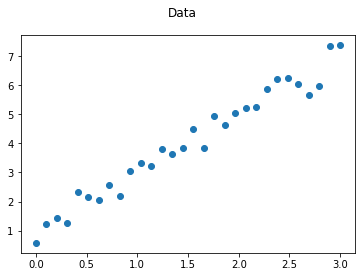

In [1221]:
N = 30
x, y = generate_linear_data(N)
plot(x, y, "Data")

Params a, b that we are going to find (a*x+b=y) initialized to 0.1.

In [1255]:
a = torch.tensor([0.1], requires_grad=True)
b = torch.tensor([0.1], requires_grad=True)

Our loss function will be MSE

In [1256]:
mse_loss = lambda pred, true: ((pred-true)**2).mean()

Define SGD optimizer and data tensors

In [1257]:
optimizer = SGD((a,b), lr=1e-1)
inputs = torch.tensor(x.reshape(N,1))
targets = torch.tensor(y.reshape(N,1))

An epoch consists of
1. Calculating the mean loss.
2. Calling .backward() to calculate the derivatives with respect to loss.
3. optimizer.step()
4. Zero the derivatives to not accumulate them with the next epoch.

In [1258]:
def run_epoch(epoch):
    optimizer.zero_grad()
    output = a*inputs + b
    loss = mse_loss(output, targets)
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch}, train loss: {loss.item():.3f}, a.grad={a.grad.item():.2f}, b.grad={b.grad.item():.2f}")
    preds = a*inputs + b
    plot_regression(x, y, f"After epoch {epoch}, a={a.item():.2f}, b={b.item():.2f}", preds.detach().numpy())

Epoch: 1, train loss: 17.378, a.grad=-14.44, b.grad=-7.55


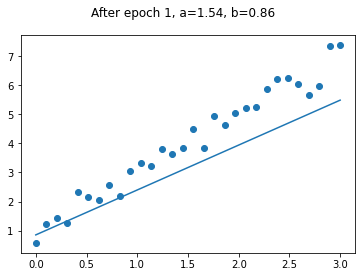

In [1259]:
run_epoch(1)

Epoch: 2, train loss: 1.036, a.grad=-3.36, b.grad=-1.71


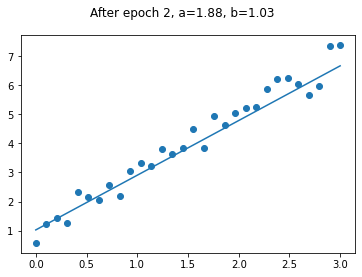

In [1260]:
run_epoch(2)

Epoch: 3, train loss: 0.161, a.grad=-0.80, b.grad=-0.36


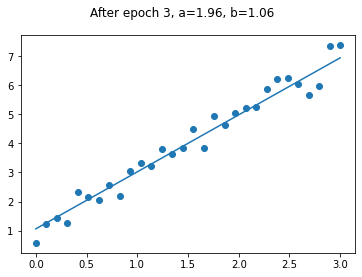

In [1261]:
run_epoch(3)

We use Stochastic Gradient Descent with learning rate = 0.1, so after each epoch we get *a <- a - a.grad * 0.1* (similarly for b)